In [1]:
import pandas as pd
import numpy as np
import smogn
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,roc_auc_score,precision_score,recall_score,f1_score, r2_score

In [2]:
from sklearn.preprocessing import StandardScaler


In [3]:
import lightgbm as lgb
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [4]:
data_Madrid = pd.read_csv('Storms_20221130.csv', sep=';')
data_Madrid.head()

,Volume,MaximumRainfallIntensity,Runoff,RunoffVolume,MaximumRunoffIntensity,P-0,HR-1,HR-2,HR-3,HR-4,...,PB-1,PB-2,PB-3,PB-4,PB-5,VV-1,VV-2,VV-3,VV-4,VV-5
0,4.1,1.4,0,0.0,0.0,0.8,79,75.0,81.0,90.0,...,944,945.0,946.0,947.0,947,1.62,0.77,0.80,0.89,0.88
1,1.6,0.7,0,0.0,0.0,0.1,96,96.0,95.0,96.0,...,939,940.0,941.0,941.0,941,0.72,0.77,0.67,0.73,1.04
2,0.1,0.1,0,0.0,0.0,0.1,75,68.0,63.0,54.0,...,943,943.0,943.0,944.0,945,2.05,1.91,2.14,2.15,2.01
3,3.6,1.2,0,0.0,0.0,0.9,81,62.0,46.0,40.0,...,939,939.0,939.0,939.0,940,1.94,1.90,2.17,2.19,2.20
4,0.1,0.1,0,0.0,0.0,0.1,99,99.0,99.0,98.0,...,935,935.0,936.0,936.0,937,2.24,2.03,1.94,1.82,1.97


In [5]:

X  = data_Madrid[data_Madrid.columns.difference(['Runoff', 'RunoffVolume', 'MaximumRunoffIntensity', 'Volume', 'MaximumRainfallIntensity'])]
y = data_Madrid['Runoff']
y_2 = data_Madrid['RunoffVolume']
y_3 = data_Madrid['MaximumRunoffIntensity']
y_4 = data_Madrid['Volume']
y_5 = data_Madrid['MaximumRainfallIntensity']
X = X.to_numpy()
y = y.to_numpy()
y_2 = y_2.to_numpy()
y_3 = y_3.to_numpy()

In [6]:
data_Madrid.columns.difference(['Runoff', 'RunoffVolume', 'MaximumRunoffIntensity', 'Volume', 'MaximumRainfallIntensity'])

Index(['HR-1', 'HR-2', 'HR-3', 'HR-4', 'HR-5', 'P-0', 'PB-1', 'PB-2', 'PB-3',
       'PB-4', 'PB-5', 'T-1', 'T-2', 'T-3', 'T-4', 'T-5', 'VV-1', 'VV-2',
       'VV-3', 'VV-4', 'VV-5'],
      dtype='object')

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_2_train, y_2_test = y_2[train_index], y_2[test_index]
    y_3_train, y_3_test = y_3[train_index], y_3[test_index]
    y_4_train, y_4_test = y_4[train_index], y_4[test_index]
    y_5_train, y_5_test = y_5[train_index], y_5[test_index]

In [8]:
#volume_train = np.load('volume_train.npy') #np.load('volume_train.npy')
#volume_test = np.load('volume_test.npy') #np.load('volume_test.npy')
#intensity_train = np.load('intensity_train.npy') #np.load('intensity_train.npy')
#intensity_test = np.load('intensity_test.npy') #np.load('intensity_test.npy')
print(X_train.shape)

(2551, 21)


In [9]:
# RRegression Values modeifications
#y_2_train[y_2_train > 10] = 10.0
#y_2_test[y_2_test > 10] = 10.0



In [10]:
#X_train = np.concatenate((X_train, volume_train.reshape(-1, 1), intensity_train.reshape(-1, 1)), axis=1)
#X_test = np.concatenate((X_test,  volume_test.reshape(-1, 1), intensity_test.reshape(-1, 1)), axis=1)

In [11]:
print(X_train.shape, X_test.shape)

(2551, 21) (638, 21)


In [12]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#lgb_train = lgb.Dataset(X_train, y_2_train)


In [14]:
print(X_train)

[[-1.23822169e+00 -1.20503297e+00 -1.12339192e+00 ... -3.86079478e-01
   2.13420165e-01  2.28468053e-01]
 [ 1.71799366e-01  1.26277624e-01  8.27867346e-02 ...  9.79281581e-01
   9.36134605e-01  9.58232659e-01]
 [-3.83663475e-01 -5.17904921e-01 -6.92613832e-01 ... -8.44521878e-01
  -9.20839998e-01 -7.91203040e-01]
 ...
 [-8.45680995e-02 -2.55888532e-03 -3.36888395e-03 ...  8.99552468e-01
   1.61869824e+00  1.84794567e+00]
 [-1.40913334e+00 -1.54859699e+00 -1.51109221e+00 ...  8.09857216e-01
   7.85569096e-01  7.98284252e-01]
 [ 6.84534296e-01  6.41623659e-01  6.85876064e-01 ...  1.52092034e-01
   1.33118560e-01 -1.45778144e-03]]


In [15]:
'''
polynom_fit_SMOTE_bus,
polynom_fit_SMOTE_star,
ROSE,
Gazzah,
SPY,
MSMOTE,
AHC,
RWO_sampling,
polynom_fit_SMOTE_mesh,
polynom_fit_SMOTE_poly
'''

'\npolynom_fit_SMOTE_bus,\npolynom_fit_SMOTE_star,\nROSE,\nGazzah,\nSPY,\nMSMOTE,\nAHC,\nRWO_sampling,\npolynom_fit_SMOTE_mesh,\npolynom_fit_SMOTE_poly\n'

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import smote_variants as sv
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import sklearn.datasets as datasets
from sklearn.neural_network import MLPClassifier

dataset= {'data': X_train,
          'target': y_train,
          'name': 'Andromeda'}

classifier = LGBMClassifier(boosting_type="gbdt",is_unbalance=True, random_state=5, 
                  n_estimators=300,num_leaves=30, max_depth=2,feature_fraction=0.5, 
                  bagging_fraction=0.8, bagging_freq=15, learning_rate=0.01)




# Classifier Testing

# training the best techniques using the entire dataset
X_samp, y_samp= sv.Gazzah(proportion=2.5).sample(X_train, y_train)
classifier.fit(X_samp, y_samp)
preds2 = classifier.predict(X_test)
print(X_test)
print('Acc Score: ',accuracy_score(y_test, preds2))
print('Roc Auc Score: ',roc_auc_score(y_test, preds2))
print('Precision Score: ',precision_score(y_test, preds2))
print('Recall Score: ',recall_score(y_test, preds2))
print('f1 score: ',f1_score(y_test, preds2))
preds_train = classifier.predict(X_train)


#Gazzah(proportion=2.5) 0.3846

2023-03-21 15:41:34,066:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 2.5, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2023-03-21 15:41:34,069:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 2.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2023-03-21 15:41:34,070:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 2.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2023-03-21 15:41:34,120:INFO:Gazzah: Removing 662 majority samples


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[[ 1.02635758  0.85635117  0.68587606 ...  2.35460878  2.07039477
   0.92824233]
 [-1.92186827 -2.02099752 -2.11418154 ... -0.3661472  -0.18808786
   0.27845193]
 [-1.49458916 -1.54859699 -1.51109221 ...  0.56070374  0.03274155
   0.02853254]
 ...
 [ 0.04361563  0.21216863  0.25509797 ...  0.33148254  1.83952765
   0.99821976]
 [-0.0845681  -0.1743409  -0.17568012 ... -0.136926   -0.42899267
  -0.30136104]
 [ 0.6845343   0.46984165  0.55664264 ... -0.10702758  0.14315626
  -0.20139329]]
Acc Score:  0.8244514106583072
Roc Auc Score:  0.7164071510957325
Precision Score:  0.28688524590163933
Recall Score:  0.5833333333333334
f1 score:  0.384615

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, preds2)

array([[491,  87],
       [ 25,  35]], dtype=int64)

In [18]:
# Preparing prediction out
X_test = np.concatenate((X_test, preds2.reshape(-1, 1)), axis=1)
X_train = np.concatenate((X_train, preds_train.reshape(-1, 1)), axis=1)
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

lgb_eval = lgb.Dataset(X_test, y_2_test)

lgb_train = lgb.Dataset(X_train, y_2_train)



In [19]:
print(X_train.shape)

(2551, 22)


In [20]:
# defining parameters 
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 50,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=200)

[1]	valid_0's l2: 4.83576	valid_0's l1: 0.841752
Training until validation scores don't improve for 200 rounds
[2]	valid_0's l2: 4.79465	valid_0's l1: 0.838055
[3]	valid_0's l2: 4.75651	valid_0's l1: 0.831237
[4]	valid_0's l2: 4.72024	valid_0's l1: 0.826779
[5]	valid_0's l2: 4.69329	valid_0's l1: 0.821291
[6]	valid_0's l2: 4.66493	valid_0's l1: 0.818127
[7]	valid_0's l2: 4.63632	valid_0's l1: 0.815453
[8]	valid_0's l2: 4.64493	valid_0's l1: 0.813504
[9]	valid_0's l2: 4.65823	valid_0's l1: 0.812713
[10]	valid_0's l2: 4.6713	valid_0's l1: 0.810034
[11]	valid_0's l2: 4.69094	valid_0's l1: 0.80923
[12]	valid_0's l2: 4.71079	valid_0's l1: 0.80633
[13]	valid_0's l2: 4.71335	valid_0's l1: 0.805436
[14]	valid_0's l2: 4.71907	valid_0's l1: 0.803458
[15]	valid_0's l2: 4.72828	valid_0's l1: 0.803725
[16]	valid_0's l2: 4.72803	valid_0's l1: 0.803055
[17]	valid_0's l2: 4.76134	valid_0's l1: 0.804322
[18]	valid_0's l2: 4.76644	valid_0's l1: 0.806522
[19]	valid_0's l2: 4.78735	valid_0's l1: 0.805379


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[27]	valid_0's l2: 4.96712	valid_0's l1: 0.811447
[28]	valid_0's l2: 4.98932	valid_0's l1: 0.812437
[29]	valid_0's l2: 4.98807	valid_0's l1: 0.81032
[30]	valid_0's l2: 4.99598	valid_0's l1: 0.811339
[31]	valid_0's l2: 5.0085	valid_0's l1: 0.812708
[32]	valid_0's l2: 5.03714	valid_0's l1: 0.814166
[33]	valid_0's l2: 5.06553	valid_0's l1: 0.814404
[34]	valid_0's l2: 5.07053	valid_0's l1: 0.812907
[35]	valid_0's l2: 5.08122	valid_0's l1: 0.813497
[36]	valid_0's l2: 5.11412	valid_0's l1: 0.816553
[37]	valid_0's l2: 5.14074	valid_0's l1: 0.817885
[38]	valid_0's l2: 5.13315	valid_0's l1: 0.821087
[39]	valid_0's l2: 5.15563	valid_0's l1: 0.822043
[40]	valid_0's l2: 5.16996	valid_0's l1: 0.823234
[41]	valid_0's l2: 5.1953	valid_0's l1: 0.825766
[42]	valid_0's l2: 5.22134	valid_0's l1: 0.827435
[43]	valid_0's l2: 5.24001	valid_0's l1: 0.830666
[44]	valid_0's l2: 5.23106	valid_0's l1: 0.830963
[45]	valid_0's l2: 5.25485	valid_0's l1: 0.833002
[46]	valid_0's l2: 5.28021	valid_0's l1: 0.836478
[47

In [21]:
preds = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [23]:
mean_squared_error(y_2_test, preds)

4.636322048668809

In [24]:
mean_absolute_error(y_2_test, preds)

0.8154530265281824

In [25]:
r2_score(y_2_test, preds)

0.04918230807248036

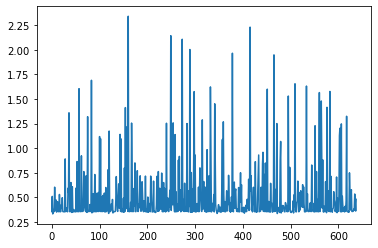

In [26]:
plt.plot(preds)

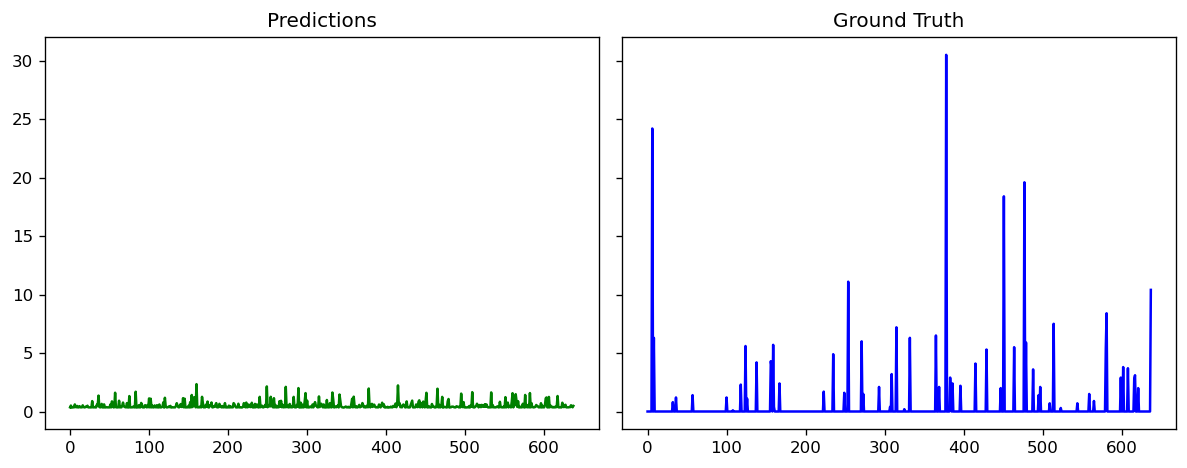

In [27]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot(preds, 'g')  # greendots
ax2.plot(y_2_test, 'b')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title('Predictions'); ax2.set_title('Ground Truth')

  # y axis limits

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

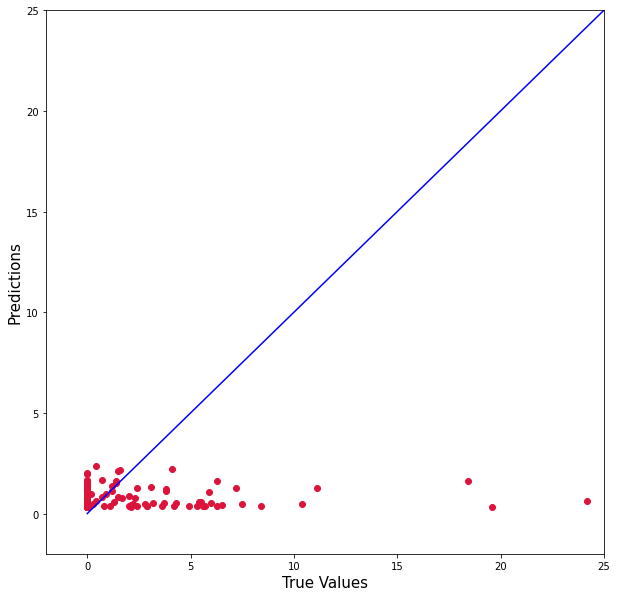

In [28]:
predicted_value = preds
true_value = y_2_test
fig = plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
plt.xlim([-2, 25])
plt.ylim([-2, 25])
plt.show()
fig.savefig('predictions_vs_true_onehour_percipitation_lgbm.pdf')

In [29]:
mean_absolute_error(y_2_test, predicted_value)

0.8154530265281824

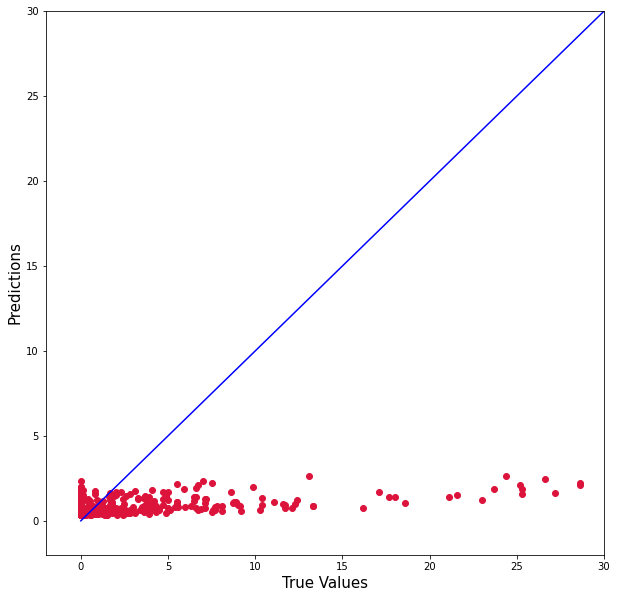

In [30]:

predicted_value = model.predict(X_train)
true_value = y_2_train
fig = plt.figure(figsize=(10,10))

plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
plt.xlim([-2, 30])
plt.ylim([-2, 30])
plt.show()

fig.savefig('predictions_vs_true_one_hour_precipitation_training.pdf')

In [31]:
print(X_train.shape)

(2551, 22)


In [32]:
np.digitize(y_test, [0, 1]) - 1
nb_classes = 2
y_train = np.eye(nb_classes)[y_train]
y_test = np.eye(nb_classes)[y_test]

import keras
from keras.layers import Dense, Softmax
model = keras.Sequential()
#model.add(Dense(69, kernel_initializer='normal', activation='relu', input_shape=(23,)))
model.add(Dense(16, kernel_initializer='normal', activation='relu', input_shape=(22,)))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(2, kernel_initializer='normal', activation='softmax'))
#loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy', )
model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=300, batch_size=64, shuffle=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_test)

print('Acc Score: ',accuracy_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1)))
print('Roc Auc Score: ',roc_auc_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1)))
#print('Precision Score: ',precision_score(y_test, preds))
#print('Recall Score: ',recall_score(y_test, preds))
print('f1 score: ',f1_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1)))


Epoch 1/300
40/40 [==============================] - 1s 10ms/step - loss: 0.6621 - accuracy: 0.9051 - val_loss: 0.6135 - val_accuracy: 0.9060
Epoch 2/300
40/40 [==============================] - 0s 5ms/step - loss: 0.5354 - accuracy: 0.9051 - val_loss: 0.4275 - val_accuracy: 0.9060
Epoch 3/300
40/40 [==============================] - 0s 5ms/step - loss: 0.3689 - accuracy: 0.9051 - val_loss: 0.3232 - val_accuracy: 0.9060
Epoch 4/300
40/40 [==============================] - 0s 4ms/step - loss: 0.3187 - accuracy: 0.9051 - val_loss: 0.3113 - val_accuracy: 0.9060
Epoch 5/300
40/40 [==============================] - 0s 5ms/step - loss: 0.3081 - accuracy: 0.9051 - val_loss: 0.3051 - val_accuracy: 0.9060
Epoch 6/300
40/40 [==============================] - 0s 4ms/step - loss: 0.3008 - accuracy: 0.9051 - val_loss: 0.3007 - val_accuracy: 0.9060
Epoch 7/300
40/40 [==============================] - 0s 5ms/step - loss: 0.2944 - accuracy: 0.9051 - val_loss: 0.2947 - val_accuracy: 0.9060
Epoch 8/300


Epoch 59/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2504 - accuracy: 0.9051 - val_loss: 0.2661 - val_accuracy: 0.9060
Epoch 60/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2506 - accuracy: 0.9051 - val_loss: 0.2669 - val_accuracy: 0.9060
Epoch 61/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2498 - accuracy: 0.9051 - val_loss: 0.2663 - val_accuracy: 0.9060
Epoch 62/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2499 - accuracy: 0.9051 - val_loss: 0.2671 - val_accuracy: 0.9060
Epoch 63/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2505 - accuracy: 0.9051 - val_loss: 0.2669 - val_accuracy: 0.9060
Epoch 64/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.9051 - val_loss: 0.2671 - val_accuracy: 0.9060
Epoch 65/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2498 - accuracy: 0.9051 - val_loss: 0.2672 - val_accuracy: 0.9060
Epoch 

40/40 [==============================] - 0s 4ms/step - loss: 0.2450 - accuracy: 0.9059 - val_loss: 0.2704 - val_accuracy: 0.9028
Epoch 117/300
40/40 [==============================] - 0s 4ms/step - loss: 0.2456 - accuracy: 0.9055 - val_loss: 0.2693 - val_accuracy: 0.9028
Epoch 118/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2455 - accuracy: 0.9055 - val_loss: 0.2705 - val_accuracy: 0.9044
Epoch 119/300
40/40 [==============================] - 0s 4ms/step - loss: 0.2457 - accuracy: 0.9059 - val_loss: 0.2703 - val_accuracy: 0.9028
Epoch 120/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2450 - accuracy: 0.9055 - val_loss: 0.2702 - val_accuracy: 0.9028
Epoch 121/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2449 - accuracy: 0.9067 - val_loss: 0.2699 - val_accuracy: 0.9028
Epoch 122/300
40/40 [==============================] - 0s 6ms/step - loss: 0.2453 - accuracy: 0.9059 - val_loss: 0.2709 - val_accuracy: 0.9028
Epoch 123/300

40/40 [==============================] - 0s 3ms/step - loss: 0.2412 - accuracy: 0.9110 - val_loss: 0.2749 - val_accuracy: 0.8966
Epoch 174/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2409 - accuracy: 0.9098 - val_loss: 0.2772 - val_accuracy: 0.8966
Epoch 175/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.9102 - val_loss: 0.2776 - val_accuracy: 0.8981
Epoch 176/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.9118 - val_loss: 0.2768 - val_accuracy: 0.8966
Epoch 177/300
40/40 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9106 - val_loss: 0.2773 - val_accuracy: 0.8966
Epoch 178/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.9118 - val_loss: 0.2776 - val_accuracy: 0.8966
Epoch 179/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2409 - accuracy: 0.9110 - val_loss: 0.2780 - val_accuracy: 0.8966
Epoch 180/300

40/40 [==============================] - 0s 4ms/step - loss: 0.2358 - accuracy: 0.9126 - val_loss: 0.2816 - val_accuracy: 0.8918
Epoch 231/300
40/40 [==============================] - 0s 4ms/step - loss: 0.2361 - accuracy: 0.9122 - val_loss: 0.2820 - val_accuracy: 0.8918
Epoch 232/300
40/40 [==============================] - 0s 4ms/step - loss: 0.2359 - accuracy: 0.9149 - val_loss: 0.2846 - val_accuracy: 0.8918
Epoch 233/300
40/40 [==============================] - 0s 4ms/step - loss: 0.2362 - accuracy: 0.9138 - val_loss: 0.2828 - val_accuracy: 0.8934
Epoch 234/300
40/40 [==============================] - 0s 4ms/step - loss: 0.2361 - accuracy: 0.9126 - val_loss: 0.2815 - val_accuracy: 0.8934
Epoch 235/300
40/40 [==============================] - 0s 4ms/step - loss: 0.2363 - accuracy: 0.9130 - val_loss: 0.2843 - val_accuracy: 0.8903
Epoch 236/300
40/40 [==============================] - 0s 4ms/step - loss: 0.2363 - accuracy: 0.9138 - val_loss: 0.2839 - val_accuracy: 0.8918
Epoch 237/300

40/40 [==============================] - 0s 4ms/step - loss: 0.2332 - accuracy: 0.9145 - val_loss: 0.2889 - val_accuracy: 0.8871
Epoch 288/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2327 - accuracy: 0.9149 - val_loss: 0.2877 - val_accuracy: 0.8918
Epoch 289/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2329 - accuracy: 0.9138 - val_loss: 0.2880 - val_accuracy: 0.8887
Epoch 290/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.9153 - val_loss: 0.2880 - val_accuracy: 0.8903
Epoch 291/300
40/40 [==============================] - 0s 4ms/step - loss: 0.2332 - accuracy: 0.9134 - val_loss: 0.2905 - val_accuracy: 0.8871
Epoch 292/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2333 - accuracy: 0.9149 - val_loss: 0.2892 - val_accuracy: 0.8887
Epoch 293/300
40/40 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.9126 - val_loss: 0.2890 - val_accuracy: 0.8887
Epoch 294/300

In [33]:
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(preds, axis=1))

array([[562,  16],
       [ 55,   5]], dtype=int64)

In [34]:
np.argmax(preds, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

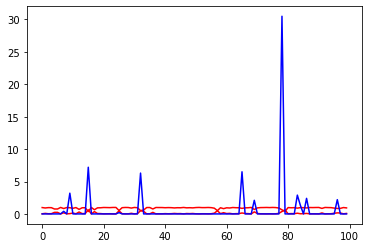

In [35]:
temp_true  = np.copy(y_2_test)
#temp_true[temp_true > 0] = 5
#preds[preds > 0] = 2
plt.plot(preds[300:400],'r', label='Prediction')
plt.plot(temp_true[300:400],'b', label='Ground Truth')
plt.show()

In [36]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [37]:
import keras
from keras.layers import Dense
model = keras.Sequential()
#model.add(Dense(69, kernel_initializer='normal', activation='relu', input_shape=(23,)))
model.add(Dense(12, kernel_initializer='normal', activation='relu', input_shape=(22,)))
model.add(Dense(5, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='relu'))
model.compile(loss='mse', optimizer='Adam', metrics='mse', )
model.fit(X_train, y_2_train, validation_data=(X_test, y_2_test), verbose=1, epochs=115, batch_size=128, shuffle=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_test)


Epoch 1/115
20/20 [==============================] - 1s 15ms/step - loss: 7.7568 - mse: 7.7568 - val_loss: 5.0503 - val_mse: 5.0503
Epoch 2/115
20/20 [==============================] - 0s 4ms/step - loss: 7.7286 - mse: 7.7286 - val_loss: 5.0225 - val_mse: 5.0225
Epoch 3/115
20/20 [==============================] - 0s 5ms/step - loss: 7.6876 - mse: 7.6876 - val_loss: 4.9752 - val_mse: 4.9752
Epoch 4/115
20/20 [==============================] - 0s 5ms/step - loss: 7.6206 - mse: 7.6206 - val_loss: 4.9110 - val_mse: 4.9110
Epoch 5/115
20/20 [==============================] - 0s 6ms/step - loss: 7.5334 - mse: 7.5334 - val_loss: 4.8542 - val_mse: 4.8542
Epoch 6/115
20/20 [==============================] - 0s 5ms/step - loss: 7.4625 - mse: 7.4625 - val_loss: 4.8246 - val_mse: 4.8246
Epoch 7/115
20/20 [==============================] - 0s 5ms/step - loss: 7.4139 - mse: 7.4139 - val_loss: 4.7991 - val_mse: 4.7991
Epoch 8/115
20/20 [==============================] - 0s 4ms/step - loss: 7.3563 - 

20/20 [==============================] - 0s 5ms/step - loss: 7.1266 - mse: 7.1266 - val_loss: 4.7014 - val_mse: 4.7014
Epoch 64/115
20/20 [==============================] - 0s 5ms/step - loss: 7.1223 - mse: 7.1223 - val_loss: 4.7019 - val_mse: 4.7019
Epoch 65/115
20/20 [==============================] - 0s 5ms/step - loss: 7.1257 - mse: 7.1257 - val_loss: 4.7094 - val_mse: 4.7094
Epoch 66/115
20/20 [==============================] - 0s 5ms/step - loss: 7.1295 - mse: 7.1295 - val_loss: 4.7093 - val_mse: 4.7093
Epoch 67/115
20/20 [==============================] - 0s 5ms/step - loss: 7.1289 - mse: 7.1289 - val_loss: 4.6991 - val_mse: 4.6991
Epoch 68/115
20/20 [==============================] - 0s 5ms/step - loss: 7.1199 - mse: 7.1199 - val_loss: 4.7037 - val_mse: 4.7037
Epoch 69/115
20/20 [==============================] - 0s 4ms/step - loss: 7.1217 - mse: 7.1217 - val_loss: 4.6982 - val_mse: 4.6982
Epoch 70/115
20/20 [==============================] - 0s 6ms/step - loss: 7.1253 - mse: 7

In [38]:
mean_squared_error(y_2_test, preds)

4.694543133377557

In [39]:
mean_absolute_error(y_2_test, preds)

0.7671286722032068

In [40]:
r2_score(y_2_test, preds)

0.03724231839894543

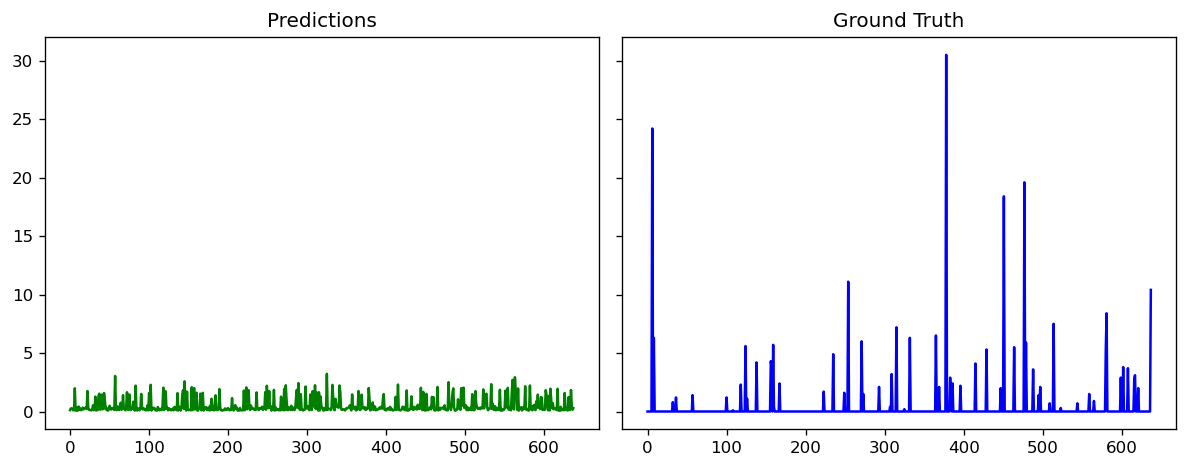

In [41]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot(preds, 'g')  # greendots
ax2.plot(y_2_test, 'b')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title('Predictions'); ax2.set_title('Ground Truth')

  # y axis limits

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

In [42]:
classifier.feature_importances_

array([ 18,  16,  13,  10,  16, 370,  66,  43,  26,  44,  51,  14,  14,
         5,   0,   7,  31,  54,  24,  33,  45])

In [43]:
features = ['HR-1', 'HR-2', 'HR-3', 'HR-4', 'HR-5', 'PB-1', 'PB-2', 'PB-3', 'PB-4','PB-5', 'T-1', 'T-2', 'T-3', 'T-4', 'T-5', 'VV-1', 'VV-2', 'VV-3','VV-4', 'VV-5', 'vol', 'intensity']

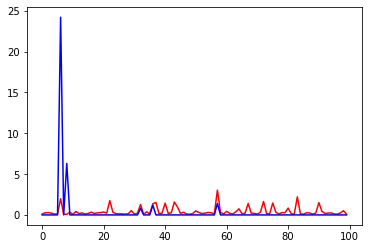

In [44]:
temp_true  = np.copy(y_2_test)
#temp_true[temp_true > 0] = 5
#preds[preds > 0] = 2
plt.plot(preds[0:100],'r', label='Prediction')
plt.plot(temp_true[0:100],'b', label='Ground Truth')
plt.show()

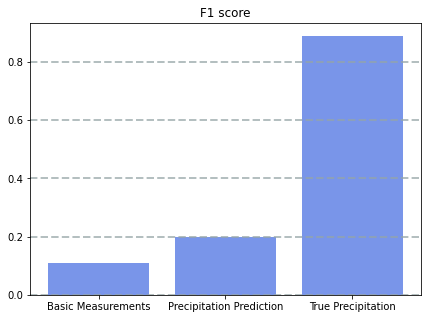

In [45]:
data = [0.11, 0.198, 0.89]

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)

x = ['Basic Measurements', 'Precipitation Prediction', 'True Precipitation']
plt.xticks(range(len(data)), x)

plt.bar(range(len(x)), data, color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title("F1 score")
plt.show()

<AxesSubplot:xlabel='importance', ylabel='features'>

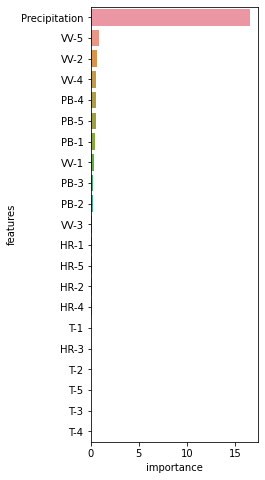

In [46]:
# plot feature importance
import seaborn as sns
features = ['HR-1', 'HR-2', 'HR-3', 'HR-4', 'HR-5', 'Precipitation', 'PB-1', 'PB-2', 'PB-3', 'PB-4','PB-5', 'T-1', 'T-2', 'T-3', 'T-4', 'T-5', 'VV-1', 'VV-2', 'VV-3','VV-4', 'VV-5']
fi_df = pd.DataFrame(features, columns=['features'])
fi_df['importance'] = classifier.booster_.feature_importance(importance_type="gain") / 15000
fig, ax = plt.subplots(1, 1, figsize=(3, 8))
sns.barplot(
    x='importance'
    , y='features'
    , data=fi_df.sort_values(by=['importance'], ascending=False)
    , ax=ax
)

In [47]:
fig.savefig("feature_importance_one_hour_precipitation.pdf",bbox_inches='tight')

In [ ]:
predicted_value = preds
true_value = y_2_test
fig = plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
plt.xlim([-2, 25])
plt.ylim([-2, 25])
plt.show()
fig.savefig('predictions_vs_true_onehour_percipitation_lgbm.pdf')